This notebook creates an alpha particle spectrum from beam data and determines the mean energy and LETd.

In [5]:
#Import libraries
from numpy import histogram
import matplotlib.pyplot as plt
import csv

In [ ]:
def energy_spec(data1,data2,data3,data4,name):
  ''' This reads the data from a Phase Space scorer and produces a histogram of 
  the initial kinetic energy of the secondary specified by "name". '''

  energies = []
  prev_id = []

  #Add data points from first data set
  for event in range(len(data1)):
    line = data1[event].split()

    if int(line[9])==1:
      energies.append(float(line[11]))
      prev_id = line[11:15]

    elif line[11:15] != prev_id:
      energies.append(float(line[11]))
      prev_id = line[11:15]

  #Now add for the second
  for event in range(len(data2)):
    line = data2[event].split()

    if int(line[9])==1:
      energies.append(float(line[11]))
      prev_id = line[11:15]

    elif line[11:15] != prev_id:
      energies.append(float(line[11]))
      prev_id = line[11:15]

  #Then the third
  for event in range(len(data3)):
    line = data3[event].split()

    if int(line[9])==1:
      energies.append(float(line[11]))
      prev_id = line[11:15]

    elif line[11:15] != prev_id:
      energies.append(float(line[11]))
      prev_id = line[11:15]

  #Finaly, the fourth
  for event in range(len(data4)):
    line = data4[event].split()

    if int(line[9])==1:
      energies.append(float(line[11]))
      prev_id = line[11:15]

    elif line[11:15] != prev_id:
      energies.append(float(line[11]))
      prev_id = line[11:15]

  plt.figure()
  my_plot = plt.hist(energies,100)
  plt.xlabel("Energy (MeV)")
  plt.ylabel("Counts")
  plt.title(name + " Energy Spectra")

  return my_plot

In [ ]:
#Open the scored alpha particle data from the four beams
Beam1 = open('/content/drive/MyDrive/Alpha Spectrum/Aspec_Beam40_S1.phsp').readlines()
Beam2 = open('/content/drive/MyDrive/Alpha Spectrum/Aspec_Beam160_S1.phsp').readlines()
Beam3 = open('/content/drive/MyDrive/Alpha Spectrum/Aspec_Beam200_S1.phsp').readlines()
Beam4 = open('/content/drive/MyDrive/Alpha Spectrum/Aspec_Beam320_S1.phsp').readlines()

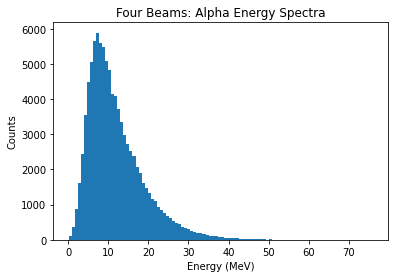

In [ ]:
arrays = energy_spec(Beam1,Beam2,Beam3,Beam4,"Four Beams: Alpha")

In [ ]:
#Determine the mean energy and the proportion of particles with energy greater 
#than 30MeV

#Initiate the mean value
weightedE = 0
#Initiate the number of alphas with energy > 30MeV
suff = 0

#Iterate over the spectrum
for element in range(len(arrays[0])):
  energy = arrays[1][element+1]
  fraction = arrays[0][element]/sum(arrays[0])
  weightedE += fraction*energy

  #Determine if the energy is greater than 30MeV
  if energy > 30:
    suff += arrays[0][element]


print(weightedE)
print(suff/sum(arrays[0]))

12.27445231131672
0.025592150490594337


In [6]:
#This script calculates the LETd based of kinetic energies from the spectrum and 
#their corresponding stopping power from the NIST ASTAR tables.

#Initiate the numerator and denominator as 0.
numerator = 0
denominator = 0

#Read csv data
with open('/content/NIST data.csv', newline='') as csvfile:
  reader = csv.DictReader(csvfile)
  for row in reader:
    KE = float(row['\ufeffKinetic Energy'])
    SP = float(row['Stopping Power'])*10**(-1)
    Count = int(row['Counts'])
    numerator += (SP**2)*Count
    denominator += SP*Count

#Calculate the LETd as the numerator divided by the denominator
print(numerator/denominator)

67.26585509840537
